In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [2]:
column_names=np.genfromtxt("meritocracy_simulation.csv",delimiter=",",dtype="str")[0]
column_names

array(['time_step', 'trainee_id', 'performance', 'personality',
       'personality_effect', 'entry_time', 'promotion_time', 'group_id',
       'group_score', 'group_share_normal', 'group_share_overachiever',
       'group_share_charismatic_idiot', 'group_winning'], dtype='<U29')

In [3]:
data_numeric=np.genfromtxt("meritocracy_simulation.csv",skip_header=1,delimiter=",")
data_string=np.genfromtxt("meritocracy_simulation.csv",skip_header=1,delimiter=",",dtype=str)
data_bool=np.genfromtxt("meritocracy_simulation.csv",skip_header=1,delimiter=",",dtype=bool)

df=pd.DataFrame()
for i in range(len(column_names)):
    if column_names[i]== "personality":
        df[column_names[i]]=data_string[:,i]
    elif column_names[i] == "group_winning":
        df[column_names[i]]=data_bool[:,i]
    else:
        df[column_names[i]]=data_numeric[:,i]

In [4]:
df

,time_step,trainee_id,performance,personality,personality_effect,entry_time,promotion_time,group_id,group_score,group_share_normal,group_share_overachiever,group_share_charismatic_idiot,group_winning
0,0.0,0.0,1.6401,overachiever,-0.8505,0.0,NaN,0.0,5.8167,0.6,0.4,0.0,True
1,0.0,1.0,0.8462,normal,0.0000,0.0,NaN,0.0,5.8167,0.6,0.4,0.0,True
2,0.0,2.0,1.1094,normal,0.0000,0.0,NaN,0.0,5.8167,0.6,0.4,0.0,True
3,0.0,3.0,0.5333,normal,0.0000,0.0,NaN,0.0,5.8167,0.6,0.4,0.0,True
4,0.0,4.0,1.6878,overachiever,-1.0505,0.0,0.0,0.0,5.8167,0.6,0.4,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29.0,1799.0,4.4237,normal,0.0000,16.0,NaN,199.0,11.1462,0.8,0.0,0.2,False
29996,29.0,2149.0,1.3895,normal,0.0000,23.0,NaN,199.0,11.1462,0.8,0.0,0.2,False
29997,29.0,2349.0,1.3262,normal,0.0000,27.0,NaN,199.0,11.1462,0.8,0.0,0.2,False
29998,29.0,1999.0,2.7096,normal,0.0000,20.0,NaN,199.0,11.1462,0.8,0.0,0.2,False


In [5]:
def descriptive_stats(df,column_name,personality=None):
    "mean, std and quartiles"
    timestep=np.arange(np.max(df["time_step"]+1))
    
    order_stat=np.empty([len(timestep),5])
    normal_stat=np.empty([len(timestep),2])
    for i in range(len(timestep)): 
        bool_filter=df["time_step"]==timestep[i]

        if personality is None:
            data=df[column_name][bool_filter]
        elif personality=="not_normal":
            extra_bool_filter=np.invert(df["personality"]=="normal")
            data=df[column_name][bool_filter*extra_bool_filter]
        else:
            extra_bool_filter=df["personality"]==personality
            data=df[column_name][bool_filter*extra_bool_filter]

        order=np.quantile(data,[0,.25,.5,.75,1])
        order_stat[i]=order
        normal_stat[i,0]=np.mean(data)
        normal_stat[i,1]=np.std(data)
    return order_stat,normal_stat    

In [6]:
def distribution_at_timesteps(df,column_name,res=60,personality=None):
    timestep=np.arange(np.max(df["time_step"]+1))
    if personality is None:
        global_min=np.min(df[column_name])
        global_max=np.max(df[column_name])
    elif personality=="not_normal":
        bool_filter=np.invert(df["personality"]=="normal")
        global_min=np.min(df[column_name][bool_filter])
        global_max=np.max(df[column_name][bool_filter])
    else:
        bool_filter=df["personality"]==personality
        global_min=np.min(df[column_name][bool_filter])
        global_max=np.max(df[column_name][bool_filter])
        
    bins=np.linspace(global_min,global_max,res+1)
    bin_centers=bins[:-1]+np.diff(bins)/2
    
    result=np.empty([len(timestep),res])
    for i in range(len(timestep)): 
        bool_filter=df["time_step"]==timestep[i]
        if personality is None:
            data=df[column_name][bool_filter]
        elif personality=="not_normal":
            extra_bool_filter=np.invert(df["personality"]=="normal")
            data=df[column_name][bool_filter*extra_bool_filter]
        else:
            extra_bool_filter=df["personality"]==personality
            data=df[column_name][bool_filter*extra_bool_filter]
        
        vals,bins=np.histogram(data,bins)
        result[i]=vals

    return result,bin_centers  

In [7]:
def plot_descr_and_distr(df,column_name,res=60,aspect=0.5,personality_filter=None):
    fig,axs=plt.subplots(1,2)
    fig.set_figheight(6)
    fig.set_figwidth(16)
    order,normal=descriptive_stats(df,column_name,personality=personality_filter)    
    alpha=[0.3,0.6,1,0.6,0.3]
    labels=["min ; max","25% ; 75%","median"]
    for i in range(5):
        if i<3:
            axs[0].plot(order[:,i],c='b',alpha=alpha[i],label=labels[i])
        else:
            axs[0].plot(order[:,i],c='b',alpha=alpha[i])
    
    axs[0].plot(normal[:,0],c='r',label='mean')
    axs[0].plot(normal[:,0]-normal[:,1],'--',c='r',label=r'$\pm$ std')
    axs[0].plot(normal[:,0]+normal[:,1],'--',c='r')
    
    axs[0].set_xlabel("time step")
    axs[0].set_ylabel(column_name)
    axs[0].legend()

    img,bc=distribution_at_timesteps(df,column_name,res=res,personality=personality_filter)
    
    ytick_every=int((res-1)/6)
    if ytick_every<1:
        ytick_every=1

    surf=axs[1].imshow(img[:,::-1].T,cmap='plasma',aspect=aspect)
    axs[1].set_xlabel("time step")
    axs[1].set_ylabel(column_name)
    
    yticks=np.arange(img.shape[1])[::-1][::ytick_every]
    yticklabs=np.round(bc[::ytick_every],2)
    axs[1].set(yticks=yticks, yticklabels=yticklabs)
    fig.colorbar(surf, shrink=1., aspect=12,label='frequency')
    #plt.show()
    return fig,axs

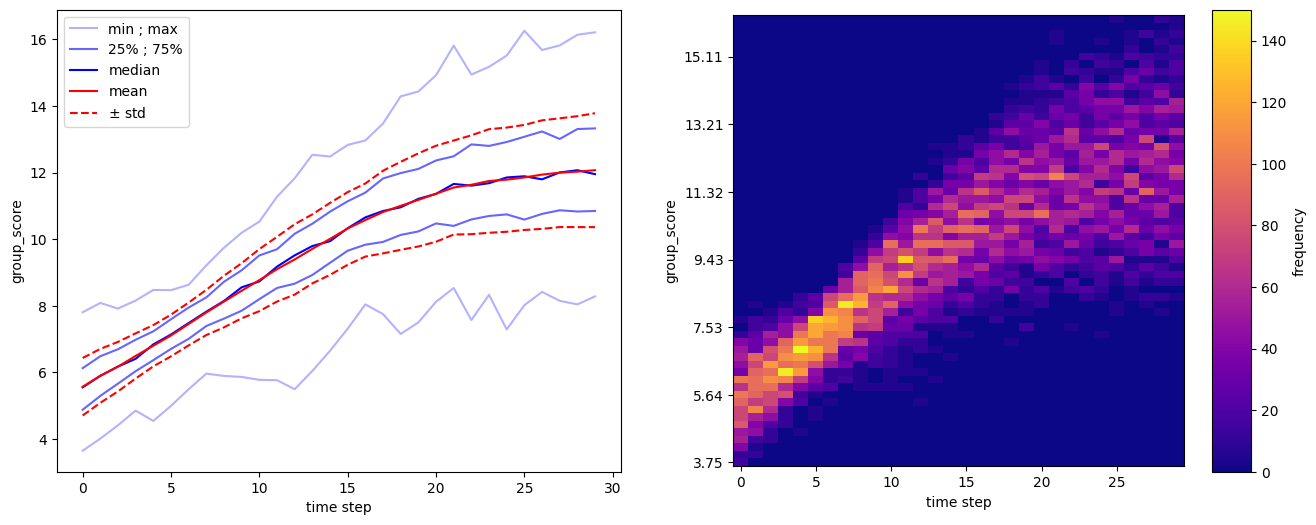

In [8]:
fig,ax=plot_descr_and_distr(df,"group_score")

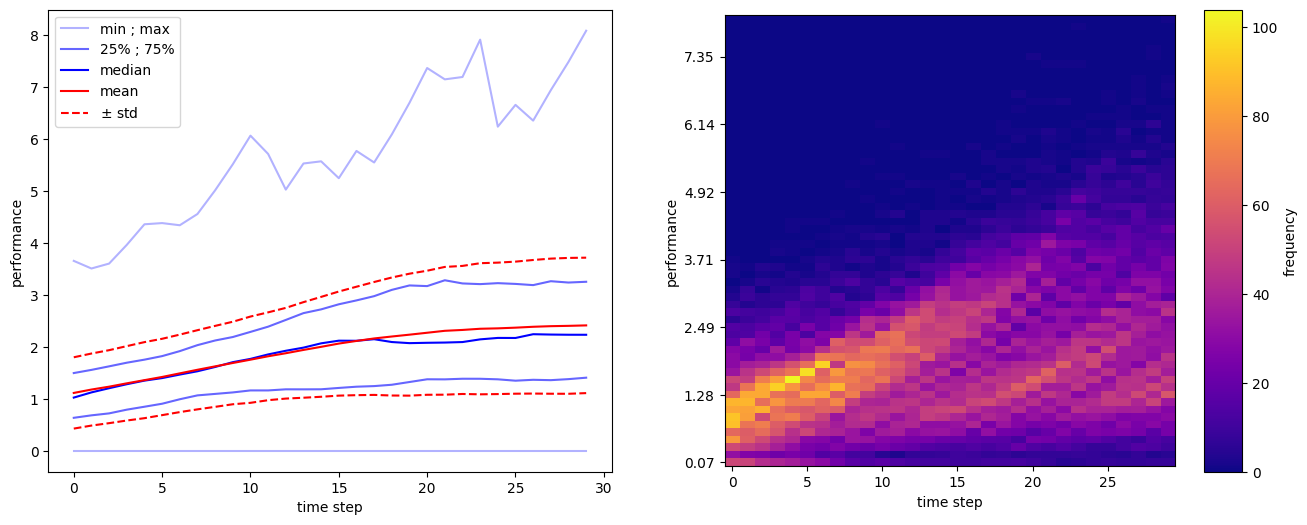

In [9]:
fig,ax=plot_descr_and_distr(df,"performance")

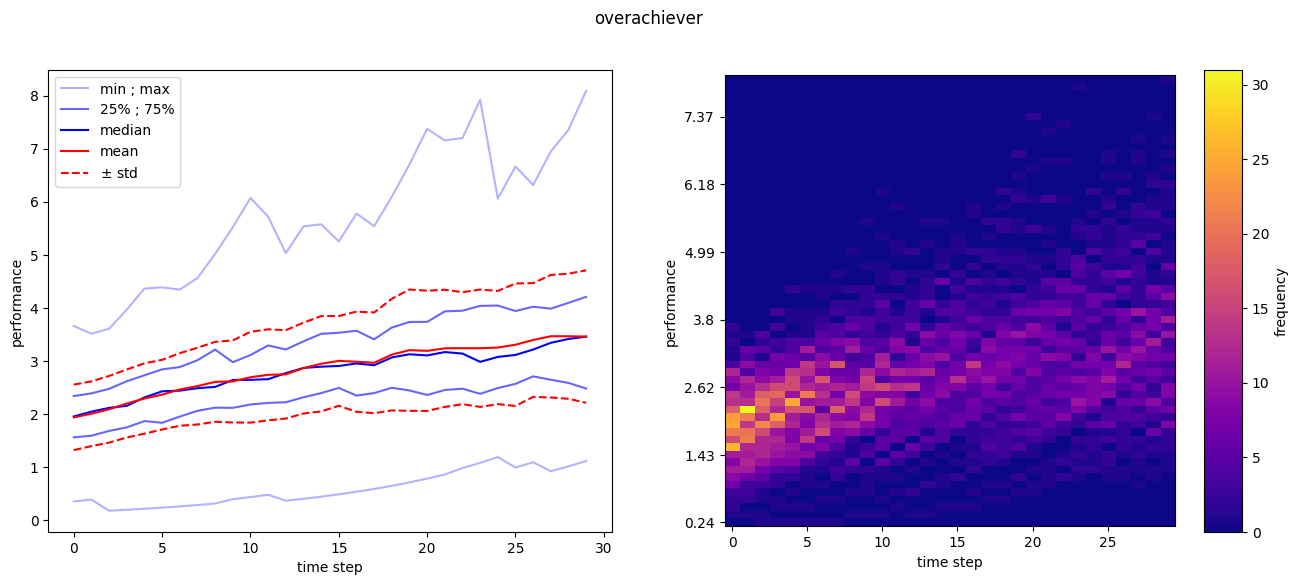

In [10]:
fig,ax=plot_descr_and_distr(df,"performance",personality_filter="overachiever")
fig.suptitle("overachiever")
plt.show()

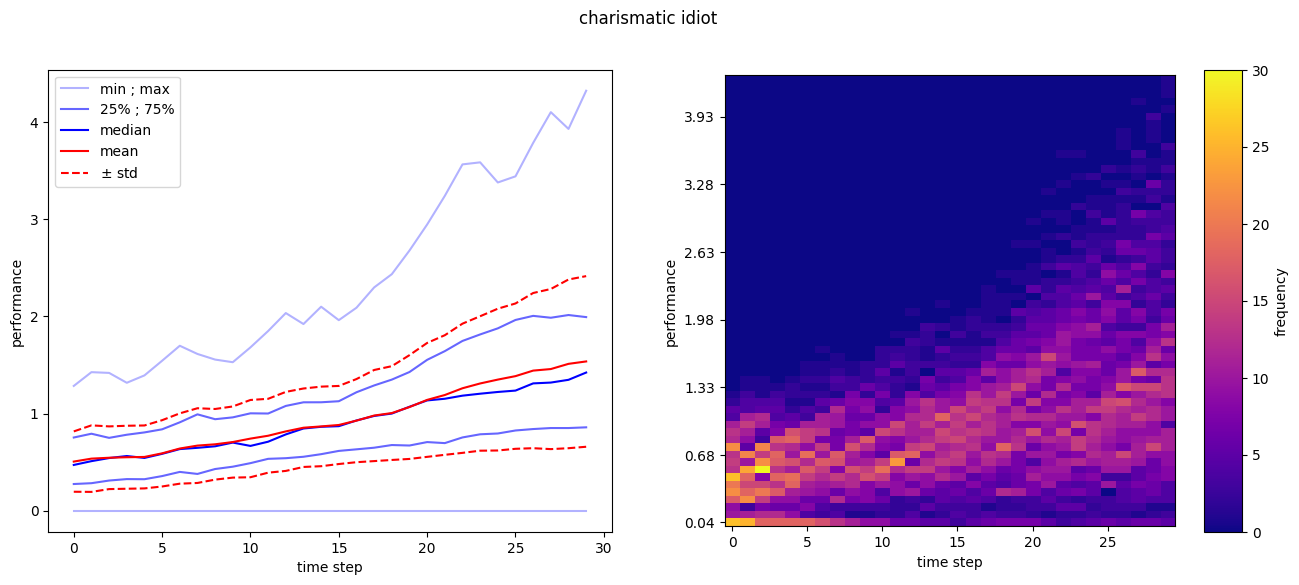

In [11]:
fig,ax=plot_descr_and_distr(df,"performance",personality_filter="charismatic idiot")
fig.suptitle("charismatic idiot")
plt.show()

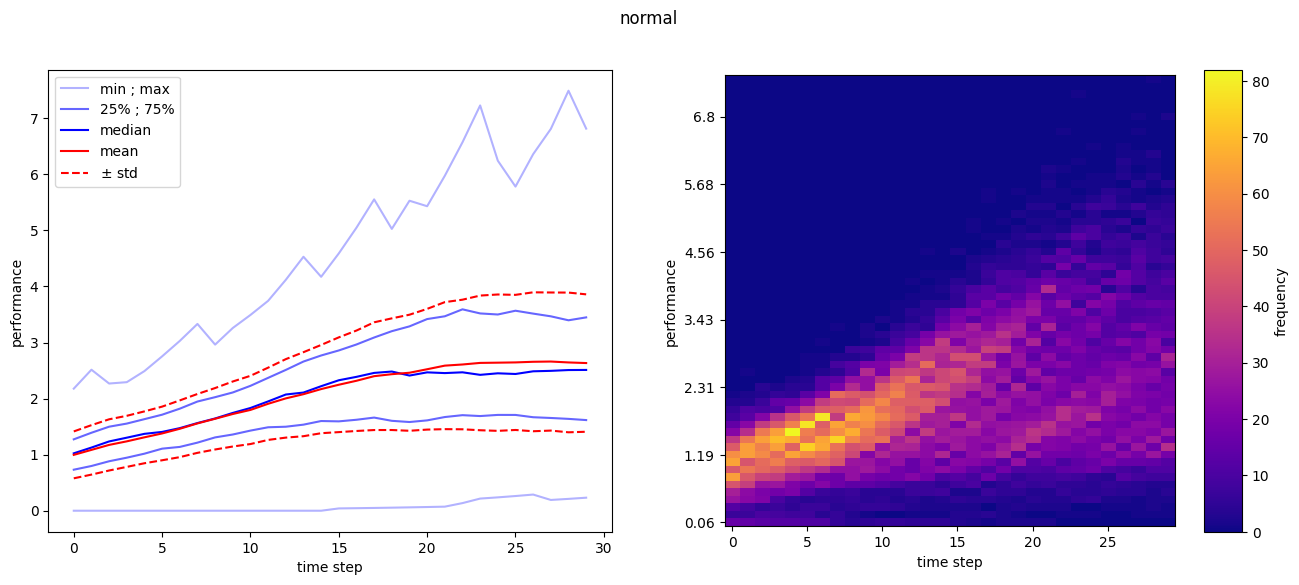

In [12]:
fig,ax=plot_descr_and_distr(df,"performance",personality_filter="normal")
fig.suptitle("normal")
plt.show()

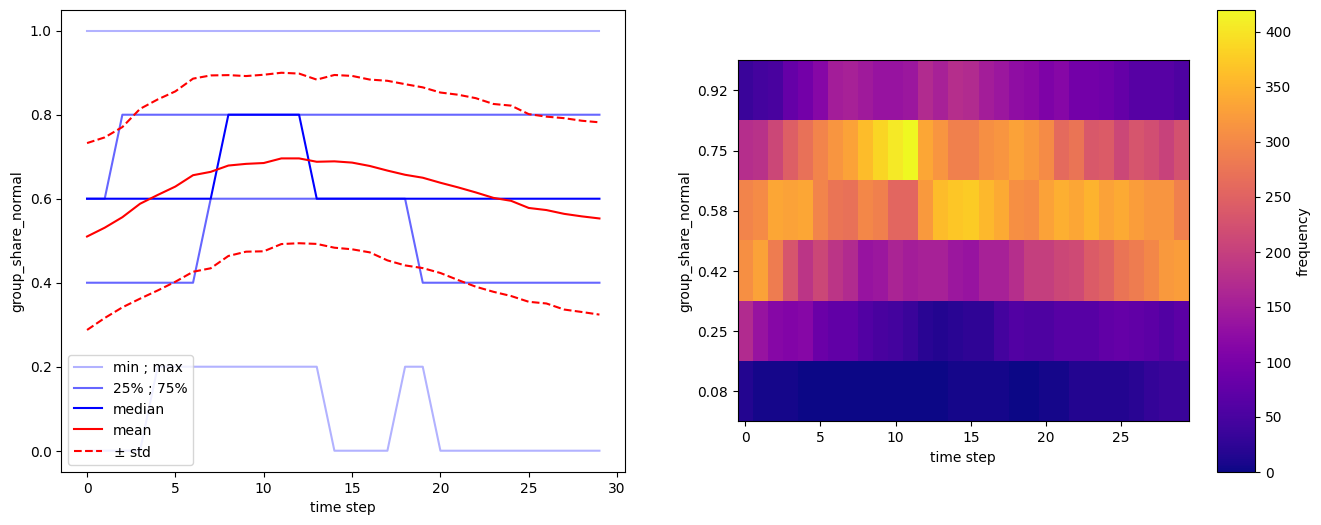

In [13]:
fig,ax=plot_descr_and_distr(df,"group_share_normal",res=6,aspect=4)

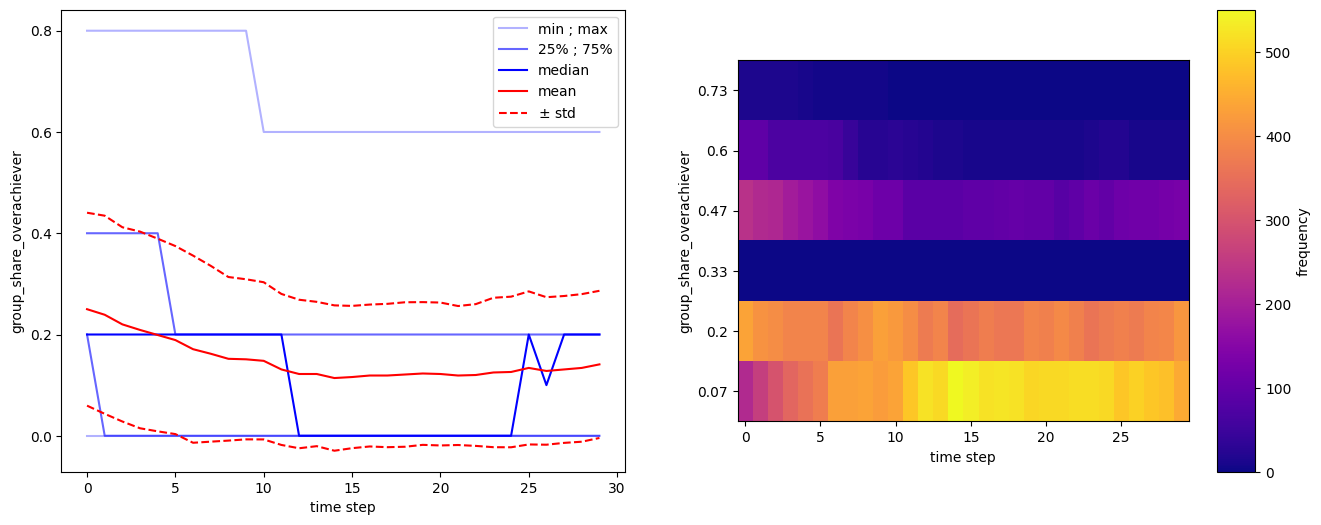

In [14]:
fig,ax=plot_descr_and_distr(df,"group_share_overachiever",res=6,aspect=4)

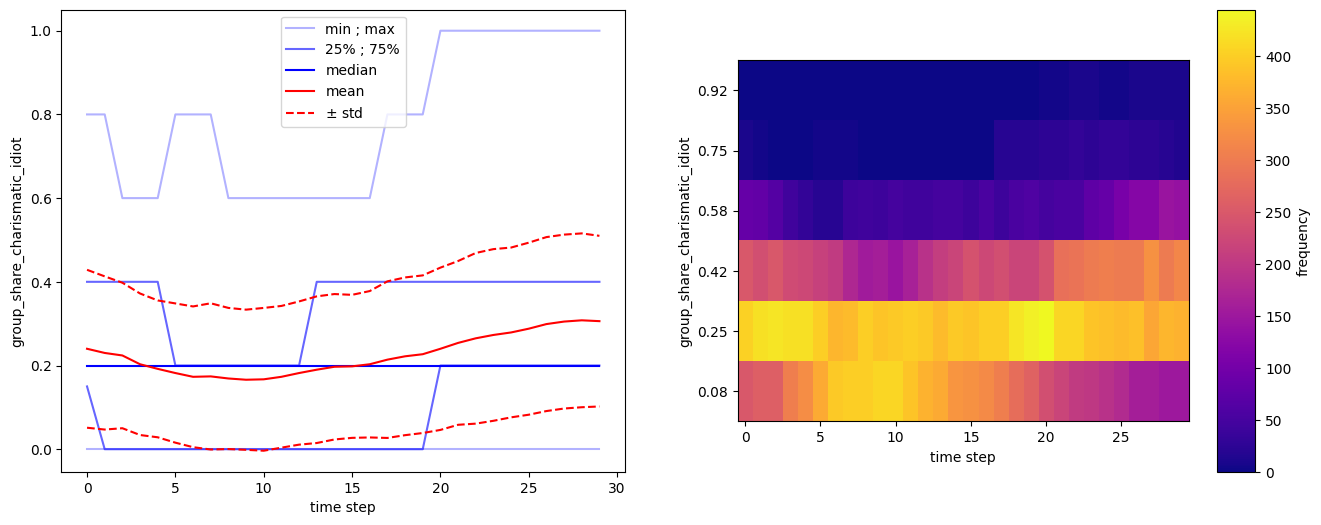

In [15]:
fig,ax=plot_descr_and_distr(df,"group_share_charismatic_idiot",res=6,aspect=4)

In [16]:
#fig,ax=plot_descr_and_distr(df,"personality_effect") # order statistics influeneced by 0s from normals

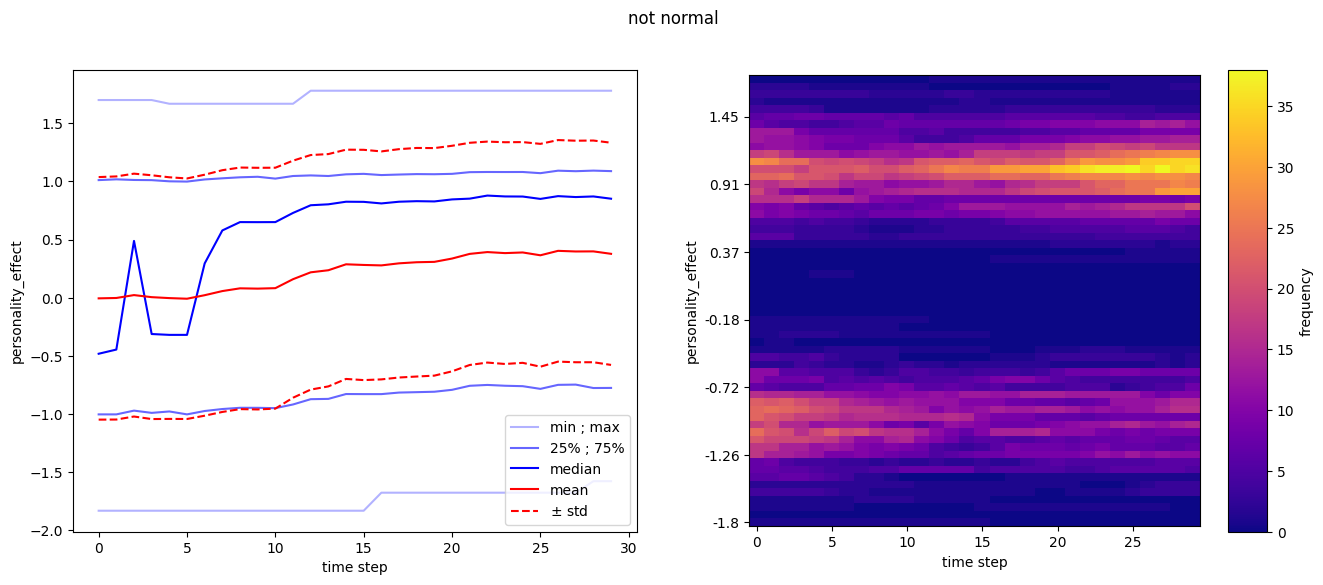

In [17]:
fig,ax=plot_descr_and_distr(df,"personality_effect",personality_filter="not_normal")
fig.suptitle("not normal")
plt.show()

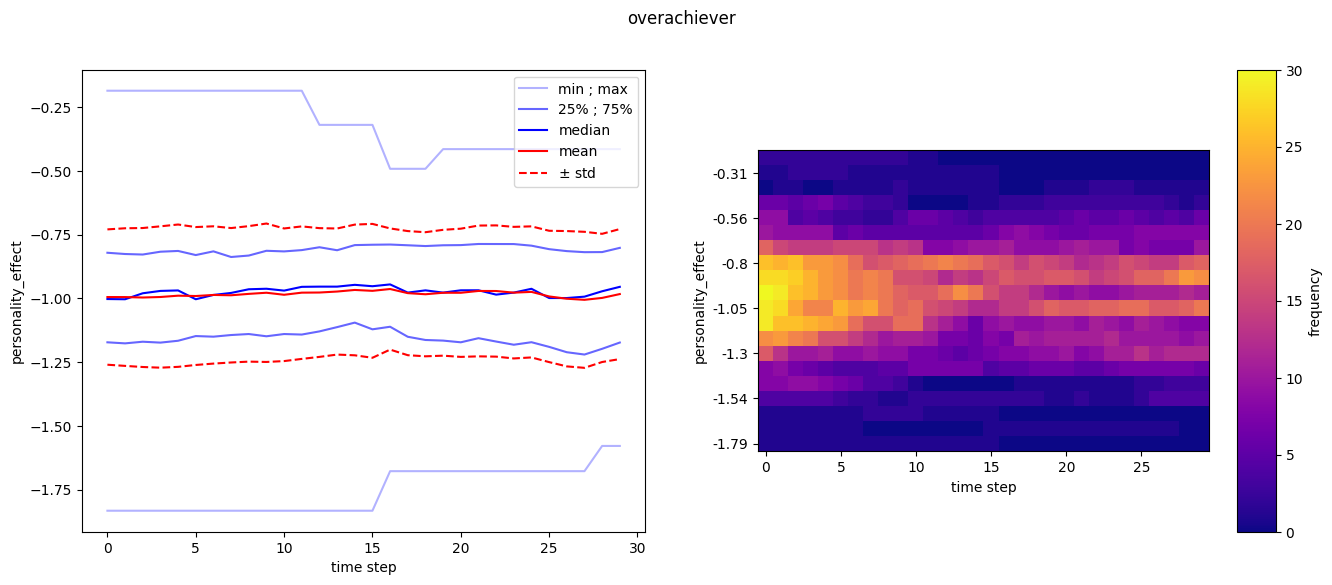

In [18]:
fig,ax=plot_descr_and_distr(df,"personality_effect",res=20,aspect=1,personality_filter="overachiever")
fig.suptitle("overachiever")
plt.show()

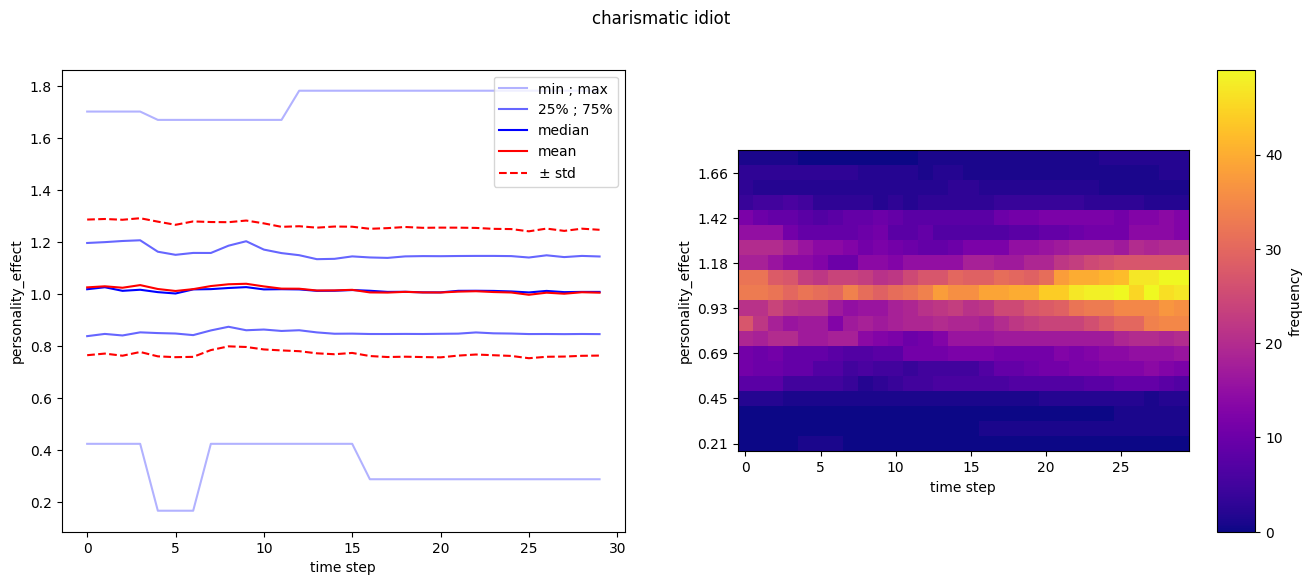

In [19]:
fig,ax=plot_descr_and_distr(df,"personality_effect",res=20,aspect=1,personality_filter="charismatic idiot")
fig.suptitle("charismatic idiot")
plt.show()

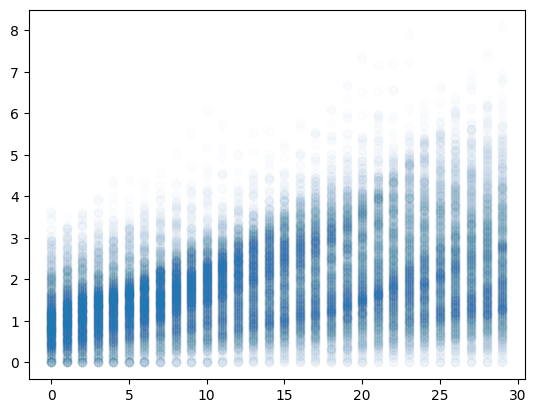

In [20]:
plt.scatter(df["time_step"],df["performance"],alpha=0.01)

In [21]:
def color_scatterplot(x_name,y_name,c_name,cmap_name="plasma",alpha=1,clims=None,filter_bool=None):
    x=df[x_name]
    y=df[y_name]
    c=df[c_name]
    
    bool_filter=np.invert(np.isnan(x))*np.invert(np.isnan(y))*np.invert(np.isnan(c))
    if filter_bool is not None:
        if filter_bool.dtype == bool:
            bool_filter *= filter_bool
        else:
            bool_filter *= np.invert(np.isnan(filter_bool))
    
    xdat=x[bool_filter]
    ydat=y[bool_filter]
    cdat=c[bool_filter]

    print("number of points: "+str(len(cdat)))
    if clims is None:
        mincdat=np.min(cdat)
        maxcdat=np.max(cdat)
        cdat_normed=cdat-mincdat
        cdat_normed /= np.max(cdat_normed)
    else:
        mincdat=clims[0]
        maxcdat=clims[1]
        cdat_normed=cdat-mincdat
        cdat_normed /= (maxcdat-mincdat)
    

    fig,ax=plt.subplots()
    cmap = mpl.colormaps[cmap_name]
    colors = cmap(cdat_normed,alpha=alpha)
    scatter=ax.scatter(xdat,ydat,c=colors)
    fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(mincdat, maxcdat), cmap=cmap_name),
             ax=ax, orientation='vertical', label=c_name)
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    return fig,ax

number of points: 30000


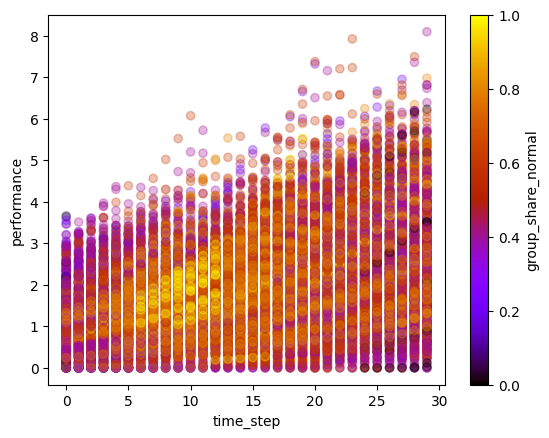

In [22]:
fig,ax=color_scatterplot("time_step","performance","group_share_normal","gnuplot",alpha=0.3)#group_share_charismatic_idiot",alpha=0.4)

number of points: 30000


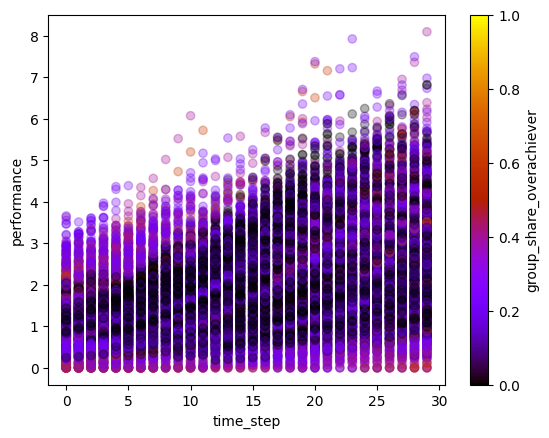

In [23]:
fig,ax=color_scatterplot("time_step","performance","group_share_overachiever","gnuplot",alpha=0.3,clims=[0,1])#group_share_charismatic_idiot",alpha=0.4)

number of points: 30000


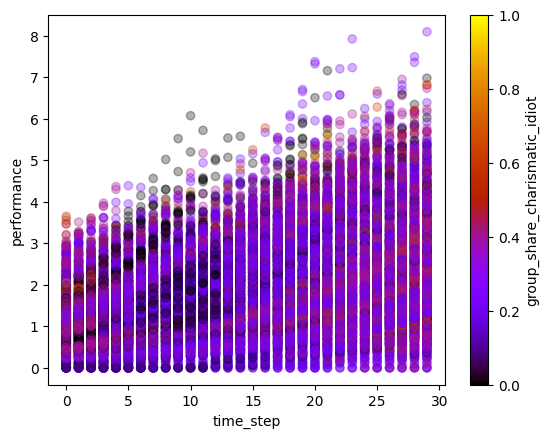

In [24]:
fig,ax=color_scatterplot("time_step","performance","group_share_charismatic_idiot","gnuplot",alpha=0.3)

number of points: 30000


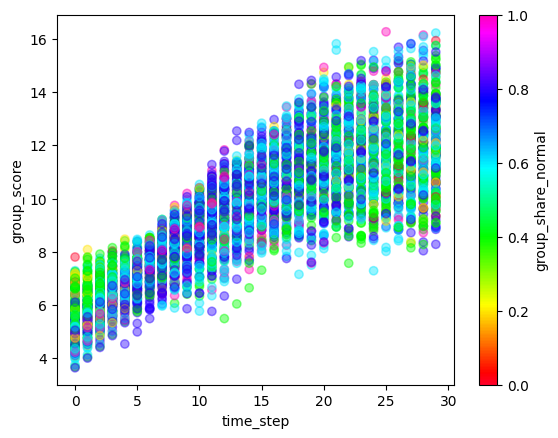

In [25]:
fig,ax=color_scatterplot("time_step","group_score","group_share_normal","gist_rainbow",alpha=0.1)

In [26]:
# note to each group correspond 5 performance values at each time step

number of points: 30000


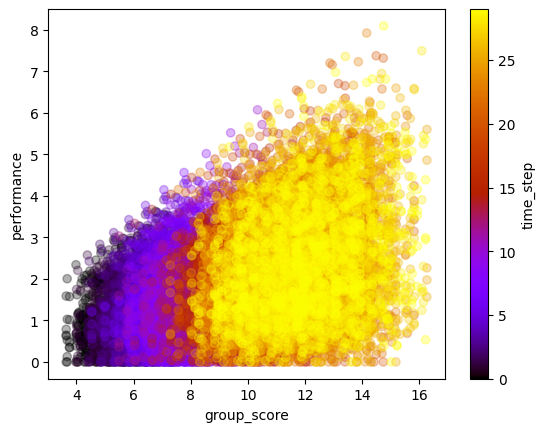

In [27]:
fig,ax=color_scatterplot("group_score","performance","time_step","gnuplot",alpha=0.3)

number of points: 7500


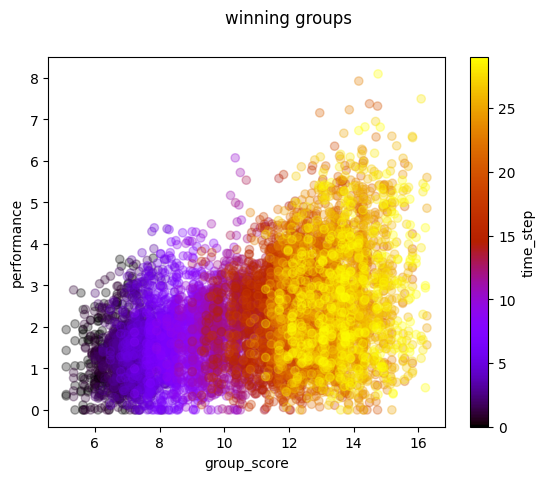

In [28]:
fig,ax=color_scatterplot("group_score","performance","time_step","gnuplot",filter_bool=df["group_winning"],alpha=0.3)
fig.suptitle("winning groups")
plt.show()

number of points: 1500


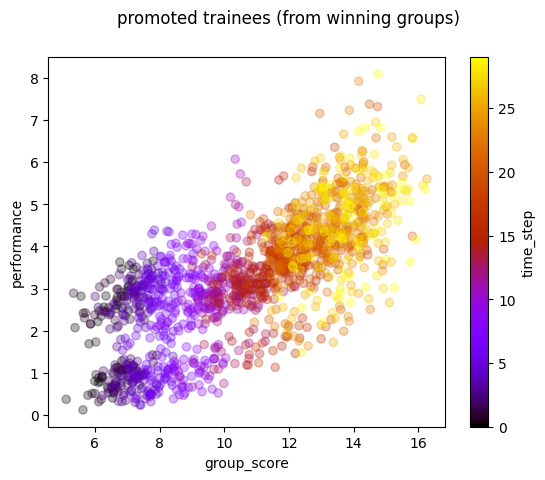

In [29]:
fig,ax=color_scatterplot("group_score","performance","time_step","gnuplot",filter_bool=df["promotion_time"],alpha=0.3)
fig.suptitle("promoted trainees (from winning groups)")
plt.show()

number of points: 1500


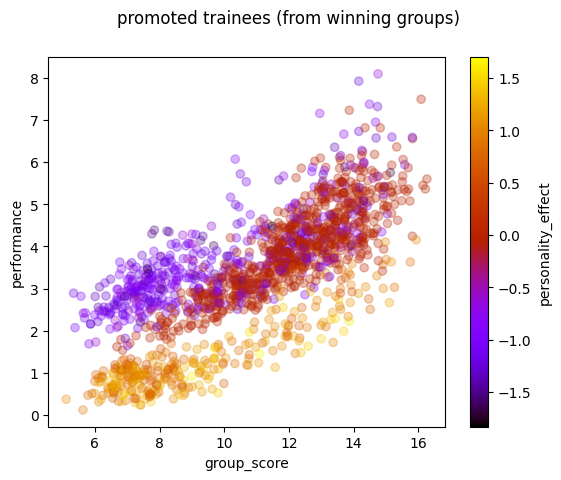

In [30]:
fig,ax=color_scatterplot("group_score","performance","personality_effect","gnuplot",filter_bool=df["promotion_time"],alpha=0.3)
fig.suptitle("promoted trainees (from winning groups)")
plt.show()

number of points: 1500


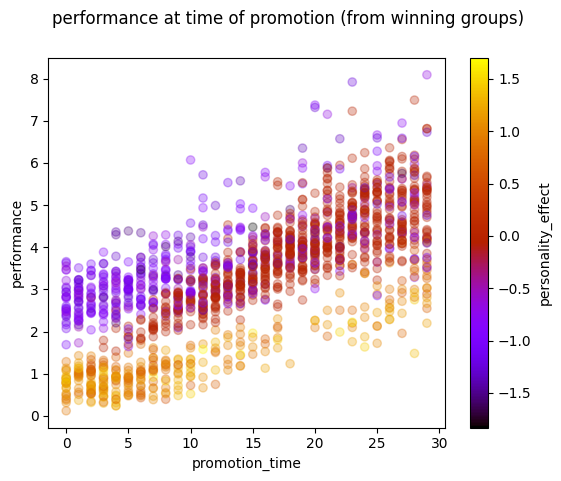

In [31]:
fig,ax=color_scatterplot("promotion_time","performance","personality_effect","gnuplot",alpha=0.3)
fig.suptitle("performance at time of promotion (from winning groups)")
plt.show()

number of points: 1500


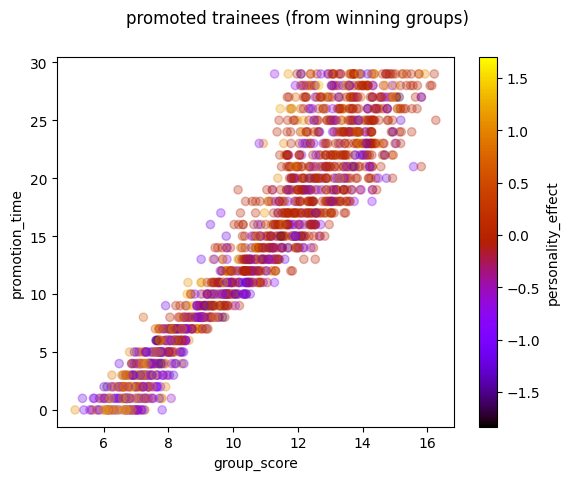

In [32]:
fig,ax=color_scatterplot("group_score","promotion_time","personality_effect","gnuplot",alpha=0.3)
fig.suptitle("promoted trainees (from winning groups)")
plt.show()

number of points: 1500


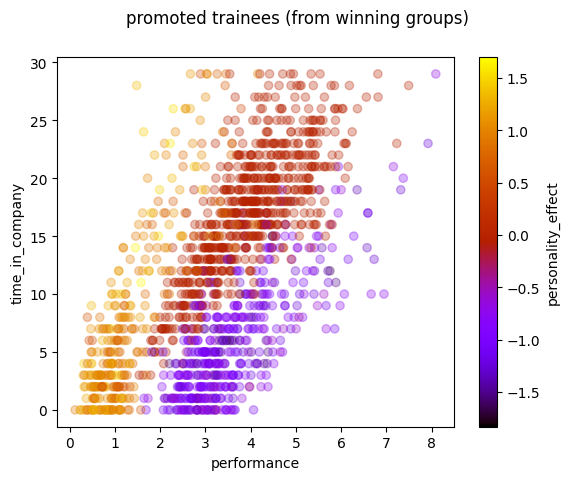

In [36]:

df["time_in_company"]=df["promotion_time"]-df["entry_time"]

fig,ax=color_scatterplot("performance","time_in_company","personality_effect","gnuplot",alpha=0.3)
fig.suptitle("promoted trainees (from winning groups)")
plt.show()

In [ ]:
# time betweens wins for each group
# differences of performance values with time

# group classification by group composition
# 5 normal
# 4 normal 1 overachiever
# 4 normal 1 charismatic idiot
# ...


In [34]:

def intra_group_variance(df): # (inverse: group homogeneity)
    pass